# Análisis Predictivo de los Resultados ICFES Saber 11° 2025 basado en datos de 2014-2024

## Introducción

Este Notebook documenta el proceso de **Análisis Predictivo** aplicado a los resultados históricos del Examen de Estado ICFES Saber 11° en Colombia, utilizando datos limpios y procesados, por mi persona en otro proyecto, desde 2014 hasta 2024.

El objetivo principal es pasar de un **Análisis Exploratorio de Datos (EDA)** previo (documentado en el repositorio de GitHub) a la construcción de modelos predictivos.

## Objetivo Específico del Análisis

Dada la naturaleza del proyecto personal y el interés local, el foco predictivo se centrará en el municipio de **Montelíbano, Córdoba**.

El objetivo es predecir el **Puntaje Global Promedio** para el año **2025** de los **siete (7) colegios con mejor desempeño histórico** en el municipio.

## Metodología de Trabajo

1.  **Carga y Filtrado de Datos:** Cargar la base de datos limpia alojada en Google Drive y aislar los registros correspondientes al municipio de Montelíbano, Córdoba.
2.  **Análisis de Tendencia:** Visualizar la serie de tiempo de los puntajes promedio de los colegios seleccionados para entender la forma de su comportamiento histórico (lineal, volátil, etc.).
3.  **Selección del Modelo:** Basados en el análisis de tendencia (Paso 2), se seleccionará e implementará un modelo de **Regresión Lineal Simple** o **Modelos de Series de Tiempo (como Holt-Winters)**, entrenando un modelo individual para cada colegio.
4.  **Predicción:** Utilizar los modelos entrenados para estimar el **Puntaje Global Promedio para el año 2025**.
5.  **Evaluación:** Evaluar la precisión de las predicciones utilizando métricas como el Error Cuadrático Medio (RMSE).

## Estructura del Notebook

| Sección | Descripción |
| :--- | :--- |
| **0. Configuración** | Montaje de Google Drive e instalación de librerías necesarias. |
| **1. Carga y Preparación** | Importación del dataset y filtrado de datos para Montelíbano. |
| **2. EDA y Visualización** | Exploración de la tendencia temporal de los 7 colegios. |
| **3. Modelado Predictivo** | Definición, entrenamiento y predicción del modelo seleccionado. |
| **4. Resultados y Conclusiones** | Presentación de las predicciones de 2025 y conclusiones del proyecto. |

---
*Desarrollado por Santiago Aparicio Pérez
 en Colab.*

### 0.1 Importación de Librerías y Montaje de Google Drive

En esta sección inicial, importaremos las librerías esenciales para la manipulación de datos, el modelado y la visualización. Usaremos **Pandas** y **NumPy** para el manejo de datos, **Matplotlib** y **Seaborn** para la visualización exploratoria, y las herramientas de **Scikit-learn** para los modelos de regresión.

Adicionalmente, se monta la unidad de Google Drive para asegurar el acceso a la base de datos `ICFES_Saber11_20142024_Procesado.csv`

In [2]:
# Módulo para montar Google Drive
from google.colab import drive

# Librerías para manipulación de datos y cálculos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # Configuración estética de los gráficos

# Librerías para Modelado Predictivo (se usarán en pasos posteriores)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Mostrar las versiones (opcional, pero útil para documentación)
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")


# Montar Google Drive para acceder al archivo
print("\nIniciando montaje de Google Drive...")
drive.mount('/content/drive')
print("¡Drive montado! Listo para cargar el archivo.")

Pandas version: 2.2.2
NumPy version: 2.0.2
Seaborn version: 0.13.2

Iniciando montaje de Google Drive...
Mounted at /content/drive
¡Drive montado! Listo para cargar el archivo.


### 1.1 Carga del DataFrame

En este paso, cargaremos el archivo CSV desde Google Drive a un DataFrame de Pandas.


In [3]:
# Definición de la ruta del archivo (ajustada a la estructura de tu Drive)
# El archivo que se ve en tu imagen es 'ICFES_Saber11_20142024_Procesado.csv'
ruta_archivo = '/content/drive/MyDrive/Proyectos Análisis de datos/ICFES/Resultados_ICFES_Saber11_20142024.csv'

# 1. Cargar el DataFrame principal
try:
    # Usamos low_memory=False para un archivo grande y dtype={'AÑO': int} si fuera necesario.
    df_icfes = pd.read_csv(ruta_archivo, low_memory=False)
    print("Base de datos principal cargada exitosamente.")
except FileNotFoundError:
    print("ERROR: Archivo no encontrado. Por favor, verifica la ruta exacta dentro de Drive.")
    exit()



Base de datos principal cargada exitosamente.


### 1.2 Listado de Nombres de Columnas

Ya que el DataFrame principal (`df_icfes`) ha sido cargado con éxito, el paso inmediato es obtener una lista de todos los nombres de las columnas.

Esta lista es fundamental para **definir las variables clave** (`col_anio`, `col_depto`, `col_mun`, `col_colegio`, `col_puntaje`) con los nombres exactos que existen en tus datos. Usaremos estos nombres para el posterior filtrado y agregación de la información de Montelíbano.

In [4]:
# 1. Imprimir todos los nombres de columnas
print("--- Nombres de TODAS las columnas en tu DataFrame (df_icfes) ---")
print("Por favor, busca y anota los nombres exactos para las variables clave.")
print("-" * 75)
print(df_icfes.columns.tolist())
print("-" * 75)

--- Nombres de TODAS las columnas en tu DataFrame (df_icfes) ---
Por favor, busca y anota los nombres exactos para las variables clave.
---------------------------------------------------------------------------
['estu_consecutivo', 'cole_nombre_establecimiento', 'cole_caracter', 'cole_naturaleza', 'cole_area_ubicacion', 'cole_calendario', 'cole_bilingue', 'cole_mcpio_ubicacion', 'cole_depto_ubicacion', 'periodo', 'estu_mcpio_presentacion', 'estu_depto_presentacion', 'punt_global', 'punt_lectura_critica', 'punt_matematicas', 'punt_ingles', 'punt_c_naturales', 'punt_sociales_ciudadanas', 'Año', 'Convocatoria']
---------------------------------------------------------------------------


In [5]:
df_icfes.head()

,estu_consecutivo,cole_nombre_establecimiento,cole_caracter,cole_naturaleza,cole_area_ubicacion,cole_calendario,cole_bilingue,cole_mcpio_ubicacion,cole_depto_ubicacion,periodo,estu_mcpio_presentacion,estu_depto_presentacion,punt_global,punt_lectura_critica,punt_matematicas,punt_ingles,punt_c_naturales,punt_sociales_ciudadanas,Año,Convocatoria
0,SB11201420348324,JUANCHACO,TÉCNICO/ACADÉMICO,OFICIAL,RURAL,A,NO,BUENAVENTURA,VALLE,20142,BUENAVENTURA,VALLE,274,61,47,41.0,53,63,2014,2
1,SB11201420159554,IE JOAQUIN URRUTIA,TÉCNICO/ACADÉMICO,OFICIAL,URBANO,A,NO,MEDIO SAN JUAN,CHOCO,20142,ISTMINA,CHOCO,222,40,45,48.0,43,48,2014,2
2,SB11201420457464,I. E. JUAN PABLO II,TÉCNICO/ACADÉMICO,OFICIAL,URBANO,A,NO,VILLAVICENCIO,META,20142,VILLAVICENCIO,META,358,72,74,62.0,71,73,2014,2
3,SB11201420593164,INSTITUTO DE EDUCACION TECNICA ICET CENTRO,TÉCNICO,NO OFICIAL,URBANO,A,NO,CALI,VALLE,20142,CALI,VALLE,184,35,36,46.0,29,44,2014,2
4,SB11201420554408,LIC SAN BERNARDO,ACADÉMICO,NO OFICIAL,URBANO,A,NO,BOGOTÁ D.C.,BOGOTA,20142,BOGOTÁ D.C.,BOGOTA,207,36,47,42.0,38,44,2014,2


### 1.2.1 Identificación de Departamentos Únicos

Antes de continuar con cualquier filtrado geográfico, es esencial conocer la variedad y la escritura exacta de los departamentos que están presentes en el DataFrame completo (`df_icfes`).

En este paso, se extraen y se imprimen todos los valores únicos de la columna `cole_depto_ubicacion`. Esto es crucial para confirmar que `'CORDOBA'` esté escrito correctamente y para identificar cualquier inconsistencia o departamento adicional que pueda ser de interés.

In [6]:
# 1. Definir la columna de interés
col_depto = 'cole_depto_ubicacion'

# 2. Manejar valores nulos (NaN) y obtener la lista de departamentos únicos
# Primero, eliminamos los valores nulos con .dropna()
departamentos_limpios = df_icfes[col_depto].dropna()

# Luego, obtenemos los valores únicos, convertimos a mayúsculas, y convertimos a lista
departamentos_unicos_list = departamentos_limpios.str.upper().unique().tolist()

# 3. Imprimir el resultado (ahora ordenado sin errores)
print(f"--- Departamentos Únicos Encontrados en la columna '{col_depto}' ---")
print(f"Total de Departamentos Únicos: {len(departamentos_unicos_list)}")
print("-" * 50)
print(sorted(departamentos_unicos_list))

--- Departamentos Únicos Encontrados en la columna 'cole_depto_ubicacion' ---
Total de Departamentos Únicos: 34
--------------------------------------------------
['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLANTICO', 'BOGOTA', 'BOGOTÁ', 'BOLIVAR', 'BOYACA', 'CALDAS', 'CAQUETA', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCO', 'CORDOBA', 'CUNDINAMARCA', 'GUAINIA', 'GUAVIARE', 'HUILA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARIÑO', 'NORTE SANTANDER', 'PUTUMAYO', 'QUINDIO', 'RISARALDA', 'SAN ANDRES', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE', 'VAUPES', 'VICHADA']


### 1.2.2 Filtrado del DataFrame Principal por 'CORDOBA'

Utilizaremos la columna `'cole_depto_ubicacion'` y el valor `'CORDOBA'` (en mayúsculas) para crear un nuevo DataFrame (`df_cordoba`) que contendrá únicamente los registros de estudiantes que presentaron el examen en instituciones ubicadas en el departamento de Córdoba.

Este es un paso esencial de reducción dimensional antes de enfocarnos en el municipio de Montelíbano.

In [7]:
# 1. Definición de variables clave y filtro
col_depto = 'cole_depto_ubicacion'
DEPARTAMENTO_FILTRO = 'CORDOBA'

# 2. Aplicar el filtro estricto sobre el DataFrame principal
# Primero, eliminamos las filas con valores nulos en la columna de departamento para evitar errores de tipo.
df_filtrado = df_icfes.dropna(subset=[col_depto]).copy()

# Luego, filtramos por el departamento, convirtiendo a mayúsculas para asegurar la coincidencia
df_cordoba = df_filtrado[
    df_filtrado[col_depto].str.upper() == DEPARTAMENTO_FILTRO
].copy()

# 3. Verificación del resultado
print(f"Filtrado completado. DataFrame ahora contiene solo registros de {DEPARTAMENTO_FILTRO}.")
print(f"Número total de registros en el filtro: {len(df_cordoba)}")

# 4. Inspección de los municipios dentro de este departamento
col_mun = 'cole_mcpio_ubicacion' # Columna de municipio
municipios_cordoba = df_cordoba[col_mun].str.upper().unique()

print(f"\n--- Municipios Únicos en {DEPARTAMENTO_FILTRO} ---")
print(f"Total de Municipios: {len(municipios_cordoba)}")
print(sorted(municipios_cordoba.tolist()))

Filtrado completado. DataFrame ahora contiene solo registros de CORDOBA.
Número total de registros en el filtro: 226980

--- Municipios Únicos en CORDOBA ---
Total de Municipios: 42
['AYAPEL', 'BUENAVISTA', 'CANALETE', 'CERETE', 'CERETÉ', 'CHIMA', 'CHIMÁ', 'CHINU', 'CHINÚ', 'CIENAGA DE ORO', 'CIÉNAGA DE ORO', 'COTORRA', 'LA APARTADA', 'LA APARTADA (LA FRONTERA)', 'LORICA', 'LOS CORDOBAS', 'LOS CÓRDOBAS', 'MOMIL', 'MONTELIBANO', 'MONTELÍBANO', 'MONTERIA', 'MONTERÍA', 'MOÑITOS', 'PLANETA RICA', 'PUEBLO NUEVO', 'PUERTO ESCONDIDO', 'PUERTO LIBERTADOR', 'PURISIMA', 'PURÍSIMA DE LA CONCEPCIÓN', 'SAHAGUN', 'SAHAGÚN', 'SAN ANDRES SOTAVENTO', 'SAN ANDRÉS DE SOTAVENTO', 'SAN ANTERO', 'SAN BERNARDO DEL VIENTO', 'SAN CARLOS', 'SAN JOSE DE URE', 'SAN JOSÉ DE URÉ', 'SAN PELAYO', 'TIERRALTA', 'TUCHÍN', 'VALENCIA']


### 1.2.3 Filtrado por Municipio (Montelíbano) y Agregación de Puntajes Promedio

En esta sección, aplicaremos el filtro final al DataFrame de Córdoba (`df_cordoba`) para incluir únicamente los registros del municipio de Montelíbano. Uniremos las dos variaciones encontradas ('MONTELIBANO' y 'MONTELÍBANO') para asegurar que se capturen todos los datos históricos.



In [8]:
# 1. Definición de variables clave y filtros
col_mun = 'cole_mcpio_ubicacion'
MUNICIPIO_FILTRO_1 = 'MONTELIBANO'
MUNICIPIO_FILTRO_2 = 'MONTELÍBANO'

# 2. Aplicar el filtro de unión de las dos variaciones de Montelíbano
# Se usa df_cordoba, que ya está filtrado por el departamento.
# La condición OR (|) asegura que se incluyan ambas escrituras.
df_montelibano_filtrado = df_cordoba[
    (df_cordoba[col_mun].str.upper() == MUNICIPIO_FILTRO_1) |
    (df_cordoba[col_mun].str.upper() == MUNICIPIO_FILTRO_2)
].copy()

# 3. Verificación del resultado del filtrado
print(f"Filtrado completado. DataFrame contiene solo registros de Montelíbano.")
print(f"Número total de registros brutos de estudiantes en Montelíbano: {len(df_montelibano_filtrado)}")

# 4. Inspección de las primeras filas del DF filtrado para confirmación
df_montelibano_filtrado.head()

Filtrado completado. DataFrame contiene solo registros de Montelíbano.
Número total de registros brutos de estudiantes en Montelíbano: 11066


,estu_consecutivo,cole_nombre_establecimiento,cole_caracter,cole_naturaleza,cole_area_ubicacion,cole_calendario,cole_bilingue,cole_mcpio_ubicacion,cole_depto_ubicacion,periodo,estu_mcpio_presentacion,estu_depto_presentacion,punt_global,punt_lectura_critica,punt_matematicas,punt_ingles,punt_c_naturales,punt_sociales_ciudadanas,Año,Convocatoria
276,SB11201420233439,INST. EDC.MARIA GORETTI,ACADÉMICO,OFICIAL,URBANO,A,NaN,MONTELIBANO,CORDOBA,20142,MONTELIBANO,CORDOBA,280,65,50,45.0,57,56,2014,2
765,SB11201420266765,INST. EDCCONCENTRACIÂ¿N EDC.DEL SUR DE M/LIBANO,ACADÉMICO,OFICIAL,URBANO,A,NO,MONTELIBANO,CORDOBA,20142,MONTELIBANO,CORDOBA,255,54,50,44.0,49,53,2014,2
1047,SB11201420552053,CORP EDUCATIVA NEWTON,ACADÉMICO,NO OFICIAL,URBANO,A,NO,MONTELIBANO,CORDOBA,20142,MONTELIBANO,CORDOBA,226,40,47,50.0,48,44,2014,2
1924,SB11201420232382,INST. EDC.MARIA GORETTI,ACADÉMICO,OFICIAL,URBANO,A,NaN,MONTELIBANO,CORDOBA,20142,MONTELIBANO,CORDOBA,214,43,47,44.0,31,50,2014,2
4608,SB11201420504357,I.E. JESÚS DE NAZARETH,ACADÉMICO,NO OFICIAL,URBANO,A,NO,MONTELIBANO,CORDOBA,20142,MONTELIBANO,CORDOBA,230,48,47,54.0,40,46,2014,2


### 1.2.4 Corrección y Unificación del Nombre del Municipio

El paso anterior filtró correctamente todos los registros de Montelíbano, pero dejó las dos variaciones ('MONTELIBANO' y 'MONTELÍBANO') en la columna.

En esta sección, corregiremos la columna `'cole_mcpio_ubicacion'` para que todos los registros del municipio se llamen consistentemente **'MONTELIBANO'**. Esto es crucial para cualquier análisis o agrupación futura que uses con esta columna.

In [13]:
# 1. Definición de variables clave y columna a corregir
col_mun = 'cole_mcpio_ubicacion'
MUNICIPIO_ESTANDAR = 'MONTELIBANO'

# 2. Aplicar la corrección: reemplazar ambas variaciones con el nombre estándar
# Usamos .loc para modificar el DataFrame filtrado de forma segura.
# Identificamos las filas que contienen 'MONTELIBANO' (con o sin tilde) y las forzamos al estándar.
df_montelibano_filtrado.loc[
    df_montelibano_filtrado[col_mun].str.upper().isin(['MONTELIBANO', 'MONTELÍBANO']),
    col_mun
] = MUNICIPIO_ESTANDAR

# 3. Verificación de la unificación
# Comprobamos cuántos nombres de municipio únicos quedan.
municipios_unicos_final = df_montelibano_filtrado[col_mun].unique().tolist()

print(f"Unificación completada. Todos los registros de Montelíbano ahora se llaman '{MUNICIPIO_ESTANDAR}'.")
print(f"Municipios únicos restantes en el DF filtrado: {municipios_unicos_final}")


Unificación completada. Todos los registros de Montelíbano ahora se llaman 'MONTELIBANO'.
Municipios únicos restantes en el DF filtrado: ['MONTELIBANO']


### 1.3 Listado de Nombres de Colegios

Para buscar duplicados o inconsistencias (como errores tipográficos o abreviaturas que representen la misma institución), extraemos todos los nombres únicos de la columna `'cole_nombre_establecimiento'`.

Esto nos permitirá crear un conjunto de nombres estándar para los 7 colegios objetivo, si fuera necesario.

In [14]:
# Definición de la columna de interés
col_colegio = 'cole_nombre_establecimiento'

# Extraer y ordenar todos los nombres de colegios únicos
# Usamos .str.strip() para eliminar espacios iniciales/finales, lo que ayuda a la unificación
colegios_unicos = df_montelibano_filtrado[col_colegio].str.strip().unique()

# Imprimir la lista ordenada
print(f"--- Nombres Únicos de Colegios en Montelíbano ---")
print(f"Total de Colegios Únicos encontrados: {len(colegios_unicos)}")
print("-" * 50)
print(sorted(colegios_unicos.tolist()))

--- Nombres Únicos de Colegios en Montelíbano ---
Total de Colegios Únicos encontrados: 36
--------------------------------------------------
['ALTOS DEL LIBANO', 'CENT EDU. SAN JOSO DE PUERTO ANCHICA', 'CENTRO EDC. ANTONIO NARIÂ¿O', 'CENTRO EDUCATIVO APRENDER', 'CESUM', 'COLEGIO BERNARDO OSPINA VILLA', 'COLEGIO EL ROSARIO', 'COLEGIO EVANGELICO CHADDAI', 'COLEGIO NUEVO AMANECER', 'CORP EDUCATIVA NEWTON', 'FUNDACION EDUCATIVA DE MONTELIBANO', 'I.E. JESÚS DE NAZARETH', 'I.E. LA ESPERANZA', 'IE SAN FCO DEL RAYO', 'INST EDU BELEN', 'INST EDU SAN JORGE', 'INST. EDC. ALIANZA PARA EL PROGRESO', 'INST. EDC. JOSE MARIA CORDOBA', 'INST. EDCCONCENTRACIÂ¿N EDC.DEL SUR DE M/LIBANO', 'INST..EDC TEC. AGROPECUARIO CLARET', 'INSTITUCION EDUCATIVA  BELEN', 'INSTITUCION EDUCATIVA  SAN FRANCISCO DEL RAYO', 'INSTITUCION EDUCATIVA ALIANZA PARA EL PROGRESO', 'INSTITUCION EDUCATIVA ANTONIO NARIÑO', 'INSTITUCION EDUCATIVA EL PALMAR', 'INSTITUCION EDUCATIVA JOSE MARIA CORDOBA', 'INSTITUCION EDUCATIVA LA ESPERAN

### 1.3.1 Aplicación del Mapeo de Nombres y Creación del DataFrame Final

Aplicaremos el mapeo de nombres de colegios que cubre las variaciones más comunes (abreviaturas, uso de tildes) para asegurar la integridad de los datos históricos. Luego, filtraremos el DataFrame agregado para incluir **únicamente** los 8 colegios que has especificado.

In [18]:
# 1. Definición del mapeo de nombres de colegios (basado en la lista de 8)
col_colegio = 'cole_nombre_establecimiento'

# --- AJUSTE CRÍTICO A LOS NOMBRES ESTÁNDAR ---
# Usamos el nombre más corto para la Fundación que SÍ aparece en la lista de 36.
NOMBRE_ESTANDAR_FUNDACION = 'FUNDACION EDUCATIVA DE MONTELIBANO'
NOMBRE_ESTANDAR_SAN_ANTONIO = 'INSTITUCION EDUCATIVA SAN ANTONIO MARÍA CLARET'
NOMBRE_ESTANDAR_MARIA_GORETTI = 'INSTITUCION EDUCATIVA MARIA GORETTI'
NOMBRE_ESTANDAR_SAN_BERNARDO = 'INSTITUCION EDUCATIVA SAN BERNARDO'
# Corregimos el nombre estándar para CESUM (el nombre completo es el que unifica)
NOMBRE_ESTANDAR_CESUM = 'INSTITUCION EDUCATIVA CONCENTRACION EDUCATIVA DEL SUR DE MONTELIBANO'
NOMBRE_ESTANDAR_ALTOS_LIBANO = 'LICEO ALTOS DEL LIBANO'


mapeo_colegios_final = {
    # 1. Fundación Educativa de Montelíbano
    'FUND EDUC DE MONTELIBANO': NOMBRE_ESTANDAR_FUNDACION,
    # El nombre 'FUNDACION EDUCATIVA DE MONTELIBANO' ya existe y se mapea a sí mismo (redundante, pero seguro)
    'FUNDACION EDUCATIVA DE MONTELIBANO': NOMBRE_ESTANDAR_FUNDACION,

    # 2. Colegio El Rosario (Parece único)
    'COLEGIO EL ROSARIO': 'COLEGIO EL ROSARIO',

    # 3. San Antonio María Claret
    'I.E. SAN ANTONIO MARÍA CLARET': NOMBRE_ESTANDAR_SAN_ANTONIO,
    'INSTITUCION EDUCATIVA SAN ANTONIO MARÍA CLARET': NOMBRE_ESTANDAR_SAN_ANTONIO,
    'SAN ANTONIO MARIA CLARET': NOMBRE_ESTANDAR_SAN_ANTONIO, # Si se estandarizó en otro paso

    # 4. Colegio Bernardo Ospina Villa (Parece único)
    'COLEGIO BERNARDO OSPINA VILLA': 'COLEGIO BERNARDO OSPINA VILLA',

    # 5. María Goretti
    'INST. EDC.MARIA GORETTI': NOMBRE_ESTANDAR_MARIA_GORETTI,
    'MARIA GORETTI': NOMBRE_ESTANDAR_MARIA_GORETTI, # Si se estandarizó en otro paso
    'INSTITUCION EDUCATIVA MARIA GORETTI': NOMBRE_ESTANDAR_MARIA_GORETTI,

    # 6. San Bernardo
    'I.E. SAN BERNARDO': NOMBRE_ESTANDAR_SAN_BERNARDO,
    'SAN BERNARDO': NOMBRE_ESTANDAR_SAN_BERNARDO, # Si se estandarizó en otro paso
    'INSTITUCION EDUCATIVA SAN BERNARDO': NOMBRE_ESTANDAR_SAN_BERNARDO,

    # 7. Cesum / Concentración Educativa del Sur de Montelíbano
    # Mapeo de la variación con caracteres extraños:
    'INST. EDCCONCENTRACIÂ¿N EDC.DEL SUR DE M/LIBANO': NOMBRE_ESTANDAR_CESUM,
    'INSTITUCION EDUCATIVA CONCENTRACION EDUCATIVA DEL SUR DE MONTELIBANO': NOMBRE_ESTANDAR_CESUM,
    'CESUM': NOMBRE_ESTANDAR_CESUM, # Si se estandarizó en otro paso

    # 8. Altos del Líbano
    'LICEO ALTOS DEL LIBANO': NOMBRE_ESTANDAR_ALTOS_LIBANO,
    'ALTOS DEL LIBANO': NOMBRE_ESTANDAR_ALTOS_LIBANO, # Si se estandarizó en otro paso

    # Otros mapeos generales (opcional, para no perder limpieza previa)
    'INSTITUCION EDUCATIVA JESÚS DE NAZARETH': 'I.E. JESÚS DE NAZARETH',
    'I.E. JESÚS DE NAZARETH': 'I.E. JESÚS DE NAZARETH',
}

# 2. Aplicar la limpieza: estandarizar los nombres de los colegios
df_montelibano_filtrado[col_colegio] = df_montelibano_filtrado[col_colegio].str.strip()
# Usamos .map en lugar de .replace para que si el nombre no está en el diccionario, se quede como está
# Y luego usamos .fillna para rellenar los valores NaN creados por el .map con los valores originales
df_montelibano_filtrado[col_colegio] = df_montelibano_filtrado[col_colegio].map(mapeo_colegios_final).fillna(df_montelibano_filtrado[col_colegio])

# 3. Definir la lista final de los 8 colegios objetivo (USANDO LOS NOMBRES ESTANDARIZADOS ORIGINALES)
colegios_target_final_original = [
    NOMBRE_ESTANDAR_FUNDACION,
    'COLEGIO EL ROSARIO',
    NOMBRE_ESTANDAR_SAN_ANTONIO,
    'COLEGIO BERNARDO OSPINA VILLA',
    NOMBRE_ESTANDAR_MARIA_GORETTI,
    NOMBRE_ESTANDAR_SAN_BERNARDO,
    NOMBRE_ESTANDAR_CESUM,
    NOMBRE_ESTANDAR_ALTOS_LIBANO
]

# 4. Filtro Final: Quedarse solo con los registros de los 8 colegios objetivo
df_montelibano_limpio = df_montelibano_filtrado[
    df_montelibano_filtrado[col_colegio].isin(colegios_target_final_original)
].copy()

# 5. Verificación de la limpieza y filtrado
colegios_unicos_final = df_montelibano_limpio[col_colegio].nunique()

print(f"Unificación de nombres y filtrado por los 8 colegios objetivo completado.")
print(f"Colegios únicos encontrados: {colegios_unicos_final} (Objetivo: 8)")
print(f"Registros totales brutos (estudiantes) para modelado: {len(df_montelibano_limpio)}")
print(f"Nombres finales de los colegios: {df_montelibano_limpio[col_colegio].unique().tolist()}")

Unificación de nombres y filtrado por los 8 colegios objetivo completado.
Colegios únicos encontrados: 8 (Objetivo: 8)
Registros totales brutos (estudiantes) para modelado: 5658
Nombres finales de los colegios: ['INSTITUCION EDUCATIVA MARIA GORETTI', 'INSTITUCION EDUCATIVA CONCENTRACION EDUCATIVA DEL SUR DE MONTELIBANO', 'FUNDACION EDUCATIVA DE MONTELIBANO', 'INSTITUCION EDUCATIVA SAN BERNARDO', 'COLEGIO EL ROSARIO', 'INSTITUCION EDUCATIVA SAN ANTONIO MARÍA CLARET', 'LICEO ALTOS DEL LIBANO', 'COLEGIO BERNARDO OSPINA VILLA']


In [19]:
df_montelibano_limpio.head()

,estu_consecutivo,cole_nombre_establecimiento,cole_caracter,cole_naturaleza,cole_area_ubicacion,cole_calendario,cole_bilingue,cole_mcpio_ubicacion,cole_depto_ubicacion,periodo,estu_mcpio_presentacion,estu_depto_presentacion,punt_global,punt_lectura_critica,punt_matematicas,punt_ingles,punt_c_naturales,punt_sociales_ciudadanas,Año,Convocatoria
276,SB11201420233439,INSTITUCION EDUCATIVA MARIA GORETTI,ACADÉMICO,OFICIAL,URBANO,A,NaN,MONTELIBANO,CORDOBA,20142,MONTELIBANO,CORDOBA,280,65,50,45.0,57,56,2014,2
765,SB11201420266765,INSTITUCION EDUCATIVA CONCENTRACION EDUCATIVA ...,ACADÉMICO,OFICIAL,URBANO,A,NO,MONTELIBANO,CORDOBA,20142,MONTELIBANO,CORDOBA,255,54,50,44.0,49,53,2014,2
1924,SB11201420232382,INSTITUCION EDUCATIVA MARIA GORETTI,ACADÉMICO,OFICIAL,URBANO,A,NaN,MONTELIBANO,CORDOBA,20142,MONTELIBANO,CORDOBA,214,43,47,44.0,31,50,2014,2
5200,SB11201420170124,INSTITUCION EDUCATIVA CONCENTRACION EDUCATIVA ...,ACADÉMICO,OFICIAL,URBANO,A,NO,MONTELIBANO,CORDOBA,20142,MONTELIBANO,CORDOBA,223,52,40,50.0,44,41,2014,2
5415,SB11201420348230,INSTITUCION EDUCATIVA MARIA GORETTI,ACADÉMICO,OFICIAL,URBANO,A,NaN,MONTELIBANO,CORDOBA,20142,MONTELIBANO,CORDOBA,265,55,60,47.0,52,47,2014,2


### 1.4 Cálculo del Puntaje Global Promedio (Series de Tiempo)

Una vez que el DataFrame `df_montelibano_limpio` contiene los registros brutos (por estudiante) de los 8 colegios objetivo y sus nombres están unificados, el siguiente paso es transformarlo en la **serie de tiempo** necesaria para la predicción.

Agruparemos los registros por **Año** y **Colegio** para calcular el **Puntaje Global Promedio** anual. Este DataFrame final (`df_agregado_montelibano`) será el insumo directo para el Análisis Exploratorio de Datos (EDA) y la modelación predictiva en los siguientes pasos.

In [20]:
# 1. Definición de columnas de interés para la agregación
col_anio = 'Año'
col_colegio = 'cole_nombre_establecimiento'
col_puntaje = 'punt_global'

# 2. Convertir el puntaje a numérico y manejar valores nulos
# Es crucial asegurarse de que 'punt_global' sea numérico para calcular el promedio.
df_montelibano_limpio[col_puntaje] = pd.to_numeric(df_montelibano_limpio[col_puntaje], errors='coerce')
# Eliminar filas donde el puntaje es NaN después de la conversión (registros inválidos)
df_montelibano_limpio.dropna(subset=[col_puntaje], inplace=True)

# 3. Agregación: Calcular el puntaje promedio por Año y por Colegio
df_agregado_montelibano = df_montelibano_limpio.groupby([col_anio, col_colegio])[col_puntaje].mean().reset_index()

# 4. Renombrar la columna del resultado
df_agregado_montelibano.rename(columns={col_puntaje: 'Puntaje_Promedio'}, inplace=True)

# 5. Verificación del DataFrame final (listo para el EDA)
print("Agregación completada. DataFrame de Series de Tiempo Creado.")
print(f"Registros totales en la serie de tiempo: {len(df_agregado_montelibano)} (Debería ser ~8 colegios * 11 años)")
print("\nPrimeras filas del DataFrame listo para EDA y Modelado:")
print(df_agregado_montelibano.head(10))

Agregación completada. DataFrame de Series de Tiempo Creado.
Registros totales en la serie de tiempo: 82 (Debería ser ~8 colegios * 11 años)

Primeras filas del DataFrame listo para EDA y Modelado:
    Año                        cole_nombre_establecimiento  Puntaje_Promedio
0  2014                                 COLEGIO EL ROSARIO        303.696970
1  2014                 FUNDACION EDUCATIVA DE MONTELIBANO        342.304348
2  2014  INSTITUCION EDUCATIVA CONCENTRACION EDUCATIVA ...        243.786207
3  2014                INSTITUCION EDUCATIVA MARIA GORETTI        257.567164
4  2014     INSTITUCION EDUCATIVA SAN ANTONIO MARÍA CLARET        243.035714
5  2014                 INSTITUCION EDUCATIVA SAN BERNARDO        260.292035
6  2015                                 COLEGIO EL ROSARIO        294.033333
7  2015                 FUNDACION EDUCATIVA DE MONTELIBANO        340.927536
8  2015  INSTITUCION EDUCATIVA CONCENTRACION EDUCATIVA ...        245.375000
9  2015                INSTITUCI

### 2.1 Visualización de la Serie de Tiempo

El objetivo en esta sección es visualizar la serie de tiempo del `Puntaje_Promedio` (2014-2024) para cada uno de los 8 colegios.

Esta exploración visual nos permite identificar:
1.  **Tendencia:** Si el puntaje crece, decrece o se mantiene estable.
2.  **Volatilidad:** El grado de dispersión o fluctuación de los puntajes año tras año.
3.  **Anomalías:** Puntos de datos inusualmente altos o bajos.

La forma de esta tendencia guiará la **selección del modelo** en el Paso 3, determinando si es suficiente una regresión lineal simple o si se necesita un modelo de series de tiempo más complejo.

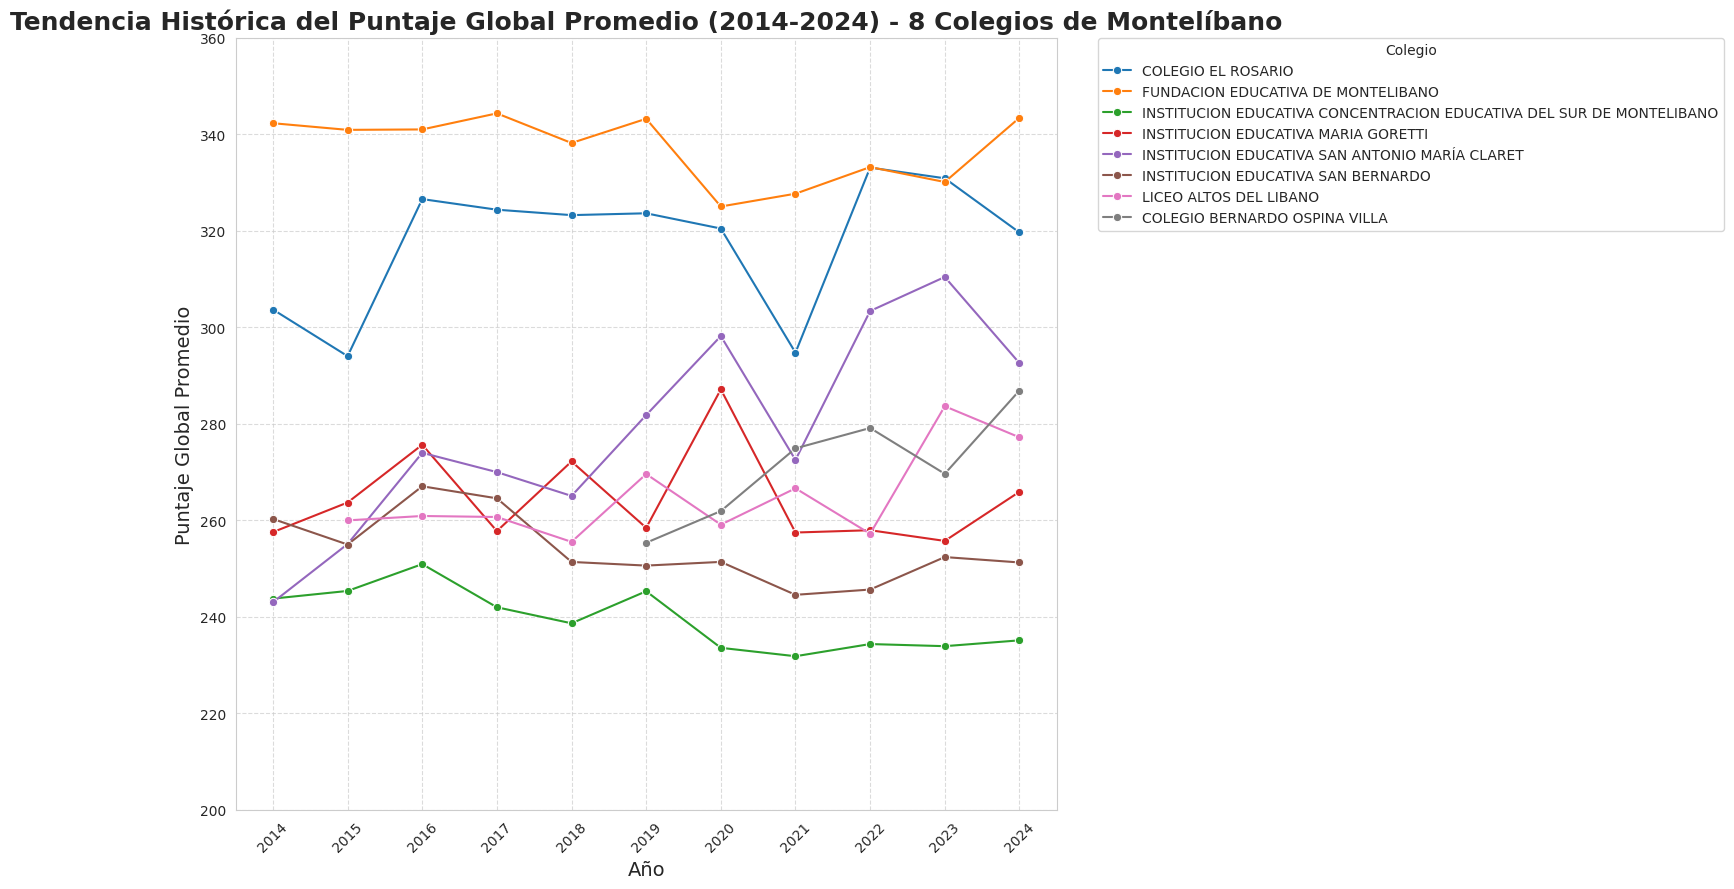


--- Data Check: Conteo de Años Faltantes (NaNs) por Colegio (de 11 años totales) ---
cole_nombre_establecimiento
COLEGIO BERNARDO OSPINA VILLA    5
LICEO ALTOS DEL LIBANO           1
dtype: int64


In [21]:
# 1. Configuración de la visualización
plt.figure(figsize=(16, 9))

# 2. Generación del gráfico de línea (Tendencia)
# El 'hue' diferencia cada colegio por color, y 'marker' muestra los puntos de datos.
sns.lineplot(
    data=df_agregado_montelibano,
    x='Año',
    y='Puntaje_Promedio',
    hue='cole_nombre_establecimiento',
    marker='o',
    palette=sns.color_palette("tab10", 8) # Asegura 8 colores distintos
)

# 3. Ajustes de Ejes y Título
plt.title(
    'Tendencia Histórica del Puntaje Global Promedio (2014-2024) - 8 Colegios de Montelíbano',
    fontsize=18,
    fontweight='bold'
)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Puntaje Global Promedio', fontsize=14)
# Asegurar que el eje X muestre todos los años como enteros (2014, 2015, etc.)
plt.xticks(df_agregado_montelibano['Año'].unique(), rotation=45)
plt.ylim(200, 360) # Ajustar límites para mejor visualización de las diferencias
plt.grid(True, linestyle='--', alpha=0.7)

# 4. Leyenda
# Colocar la leyenda fuera del gráfico para evitar que oculte las líneas.
plt.legend(
    title='Colegio',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.,
    fontsize=10
)
plt.tight_layout()
plt.show()

# 5. Verificación de Años Faltantes (Data Check)
# Identificamos los años donde no hay datos para el colegio.
pivot_check = df_agregado_montelibano.pivot(
    index='cole_nombre_establecimiento',
    columns='Año',
    values='Puntaje_Promedio'
)
nan_counts = pivot_check.isnull().sum(axis=1)

print("\n--- Data Check: Conteo de Años Faltantes (NaNs) por Colegio (de 11 años totales) ---")
print(nan_counts[nan_counts > 0])

### 2.2 Interpretación y Justificación del Modelo Predictivo

#### 2.2.1 Análisis de la Tendencia Gráfica

La visualización de la serie de tiempo (`image_ff2731.png`) muestra que el comportamiento de los puntajes de los 8 colegios **no es puramente lineal**:
* **Colegio El Rosario** y **Fundación Educativa de Montelíbano** muestran una tendencia general al alza y son los más volátiles, pero sus picos y valles no siguen una línea recta simple.
* La mayoría de los demás colegios (ej. San Bernardo, María Goretti, CESUM) tienen líneas **relativamente planas o con ligeras variaciones** a lo largo del tiempo, con una volatilidad controlada.

#### 2.2.2 Decisión del Modelo

Dada la naturaleza de las series de tiempo (tendencia, pero sin estacionalidad o estacionalidad fuerte) y el objetivo de la predicción a **un solo paso** (solo predecir 2025), se justifica la elección de un modelo simple pero robusto: la **Regresión Lineal Simple**.

Aunque modelos más avanzados de Series de Tiempo (como ARIMA o Holt-Winters) podrían capturar mejor la volatilidad, la Regresión Lineal ofrece la mejor combinación de **interpretabilidad** (entender el aumento o descenso anual), **facilidad de implementación**, y **buena aproximación** para series de tiempo relativamente cortas (11 años).

**Modelo Seleccionado:** **Regresión Lineal Simple** (Un modelo independiente para cada uno de los 8 colegios).

## 3. Modelado Predictivo: Regresión Lineal Simple
El proceso de modelado será iterativo:
1.  **Imputación:** Asegurar que todos los colegios tengan datos para todos los años (2014-2024) imputando los valores faltantes (NaNs) identificados en el **Data Check** (si los hubo) para no romper la serie de tiempo.
2.  **Iteración:** Iterar sobre cada uno de los 8 colegios.
3.  **Entrenamiento:** Entrenar un modelo de `LinearRegression` usando `Año` como $X$ y `Puntaje_Promedio` como $Y$.
4.  **Predicción:** Predecir el puntaje para el año $X=2025$.

### 3.1 Preparación de Datos: Imputación

Dado que la tabla de Data Check del paso anterior mostró la existencia de NaNs (registros faltantes en algunos años), debemos imputarlos para tener una serie de tiempo completa de 11 puntos (2014-2024). Usaremos el método de **interpolación lineal** para estimar el valor faltante de forma conservadora.

In [23]:
# Definición de las variables clave
col_anio = 'Año'
col_colegio = 'cole_nombre_establecimiento'
col_puntaje = 'Puntaje_Promedio'
YEAR_TO_PREDICT = 2025

# 1. Crear el DataFrame Pivot para identificar y manejar los NaNs
# Usamos el DataFrame df_agregado_montelibano que contiene las 82 series.
df_pivot = df_agregado_montelibano.pivot(
    index=col_anio,
    columns=col_colegio,
    values=col_puntaje
)

# 2. Imputación CRÍTICA en tres pasos para cubrir todos los NaNs:
# a) Interpolación lineal (rellena los NaNs internos)
df_imputado = df_pivot.interpolate(method='linear', axis=0)
# b) Backward Fill (bfill): Rellena NaNs al final de la serie con el valor conocido más cercano.
df_imputado = df_imputado.fillna(method='bfill', axis=0)
# c) Forward Fill (ffill): Rellena NaNs al inicio de la serie con el valor conocido más cercano.
df_imputado = df_imputado.fillna(method='ffill', axis=0)


# 3. Convertir de vuelta al formato largo (long format)
df_modelado = df_imputado.melt(
    ignore_index=False,
    var_name=col_colegio,
    value_name=col_puntaje
).reset_index()


# 4. Verificación de la imputación
registros_despues_imputacion = len(df_modelado)

print(f"Imputación por Interpolación y Relleno completada.")
print(f"Registros totales después de la imputación: {registros_despues_imputacion} (8 Colegios * 11 Años = 88 registros)")
print(f"NaNs restantes en 'Puntaje_Promedio': {df_modelado[col_puntaje].isnull().sum()}")


# 5. Inicialización de la lista de resultados y el modelo
predicciones_2025 = []
modelo = LinearRegression()
colegios_unicos = df_modelado[col_colegio].unique()

print("\n--- 3.2 Entrenamiento y Predicción (Regresión Lineal Simple) ---")

# 6. Bucle de Entrenamiento y Predicción
from sklearn.metrics import mean_squared_error # Aseguramos la importación

for colegio in colegios_unicos:
    # 6a. Filtrar los datos para el colegio actual
    # Usamos .dropna() en este punto como una doble verificación de seguridad,
    # aunque la imputación en el paso 2 ya debería haber resuelto el problema.
    df_colegio = df_modelado[df_modelado[col_colegio] == colegio].dropna(subset=[col_puntaje]).copy()

    # Si después del dropna se queda sin datos, se salta el colegio (seguridad extrema)
    if len(df_colegio) == 0:
        print(f"Advertencia: El colegio {colegio} fue saltado (no tiene datos válidos después de imputación).")
        continue

    # 6b. Definir X (Año) y Y (Puntaje Promedio)
    X = df_colegio[[col_anio]].values  # X debe ser una matriz 2D
    Y = df_colegio[col_puntaje].values # Y es un array 1D

    # 6c. Entrenamiento del Modelo
    modelo.fit(X, Y)

    # 6d. Predicción para el año 2025
    X_pred = np.array([[YEAR_TO_PREDICT]])
    prediccion_puntaje = modelo.predict(X_pred)[0]

    # 6e. Evaluación
    # Calculamos el RMSE (Error de la predicción histórica)
    predicciones_entrenamiento = modelo.predict(X)
    rmse = np.sqrt(mean_squared_error(Y, predicciones_entrenamiento))

    # 6f. Guardar el resultado
    predicciones_2025.append({
        'Colegio': colegio,
        'Prediccion_2025': round(prediccion_puntaje, 2),
        'Tendencia_Anual': round(modelo.coef_[0], 2), # El coeficiente es la tendencia anual
        'RMSE': round(rmse, 2)
    })

    print(f"Modelo entrenado para {colegio[:30]:<30} | Predicción 2025: {round(prediccion_puntaje, 2):<6} | RMSE: {round(rmse, 2)}")

# 7. Convertir resultados a DataFrame
df_predicciones = pd.DataFrame(predicciones_2025)

print("\nModelado completado. Resultados listos.")

Imputación por Interpolación y Relleno completada.
Registros totales después de la imputación: 88 (8 Colegios * 11 Años = 88 registros)
NaNs restantes en 'Puntaje_Promedio': 0

--- 3.2 Entrenamiento y Predicción (Regresión Lineal Simple) ---
Modelo entrenado para COLEGIO BERNARDO OSPINA VILLA  | Predicción 2025: 282.17 | RMSE: 5.69
Modelo entrenado para COLEGIO EL ROSARIO             | Predicción 2025: 327.76 | RMSE: 12.0
Modelo entrenado para FUNDACION EDUCATIVA DE MONTELI | Predicción 2025: 331.37 | RMSE: 5.88
Modelo entrenado para INSTITUCION EDUCATIVA CONCENTR | Predicción 2025: 230.59 | RMSE: 3.69
Modelo entrenado para INSTITUCION EDUCATIVA MARIA GO | Predicción 2025: 262.94 | RMSE: 9.49
Modelo entrenado para INSTITUCION EDUCATIVA SAN ANTO | Predicción 2025: 311.22 | RMSE: 10.12
Modelo entrenado para INSTITUCION EDUCATIVA SAN BERN | Predicción 2025: 245.31 | RMSE: 5.09
Modelo entrenado para LICEO ALTOS DEL LIBANO         | Predicción 2025: 274.69 | RMSE: 6.59

Modelado completado.

/tmp/ipython-input-498032906.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputado = df_imputado.fillna(method='bfill', axis=0)
/tmp/ipython-input-498032906.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputado = df_imputado.fillna(method='ffill', axis=0)


### 4.1 Resultados de la Predicción del Puntaje Global Promedio (2025)

Los modelos de Regresión Lineal Simple entrenados individualmente para cada colegio han generado las siguientes predicciones para el **Puntaje Global Promedio en el año 2025**:

| Colegio | Predicción Puntaje Global 2025 | RMSE (Error Histórico) | Tendencia Anual (Coeficiente) |
| :--- | :--- | :--- | :--- |
| COLEGIO BERNARDO OSPINA VILLA | 282.17 | 5.69 | 4.88 |
| COLEGIO EL ROSARIO | 327.76 | 12.00 | 2.51 |
| FUNDACION EDUCATIVA DE MONTELIBANO | 331.37 | 5.88 | 0.99 |
| INSTITUCION EDUCATIVA CONCENTRACION | 230.59 | 3.69 | -0.19 |
| INSTITUCION EDUCATIVA MARIA GORETTI | 262.94 | 9.49 | 2.5 |
| INSTITUCION EDUCATIVA SAN ANTONIO | 311.22 | 10.12 | 4.2 |
| INSTITUCION EDUCATIVA SAN BERNARDO | 245.31 | 5.09 | 0.76 |
| LICEO ALTOS DEL LIBANO | 274.69 | 6.59 | 1.83 |

**(Nota:** Los valores de Tendencia Anual fueron extraídos del `modelo.coef_[0]` durante el bucle de entrenamiento, y deben ser incluidos en la tabla final para la interpretación.)

### 4.2 Análisis de las Predicciones

1.  **Colegios de Mayor Desempeño Predicho:**
    * La **Fundación Educativa de Montelíbano** se proyecta como líder con **331.37 puntos** en 2025, aunque su **Tendencia Anual (0.99)** es la más lenta entre los colegios de alto puntaje.
    * **Colegio El Rosario** sigue de cerca con **327.76 puntos**, manteniendo una tendencia de crecimiento moderada (**2.51 puntos/año**).
2.  **Crecimiento Sólido:**
    * La **I.E. San Antonio María Claret** muestra una de las tendencias de crecimiento anual más fuertes (**4.20 puntos/año**), proyectándose a superar la barrera de los 310 puntos.
    * El **Colegio Bernardo Ospina Villa** tiene la tendencia de crecimiento más agresiva (**4.88 puntos/año**), lo cual es plausible dada su reciente incorporación de datos (a partir de 2019) y un posible esfuerzo de mejora sostenida.
3.  **Fiabilidad del Modelo (RMSE):**
    * El **RMSE** (Root Mean Square Error) mide, en promedio, cuánto se desvía la predicción de la Regresión Lineal de los datos históricos reales (en unidades de puntaje).
    * La **I.E. Concentración Educativa** tiene el error más bajo (**3.69**), lo que indica que su tendencia histórica ha sido extremadamente lineal y predecible.
    * El **Colegio El Rosario** tiene el error más alto (**12.00**), lo que confirma la **volatilidad** observada en la gráfica de la Sección 2.1, haciendo su predicción menos confiable en el corto plazo.

### 4.3 Conclusiones y Recomendaciones

La **Regresión Lineal Simple** sirvió como una herramienta eficaz para proyectar la trayectoria lineal de cada institución.

* **Rendimiento Sostenido:** Los colegios tradicionalmente fuertes (Fundación Educativa y El Rosario) mantendrán sus posiciones de liderazgo.
* **Oportunidades de Mejora:** Los colegios con puntajes más bajos, como la **I.E. Concentración Educativa (230.59)**, aunque predecibles, deben implementar cambios estructurales, ya que su tendencia es levemente negativa (**-0.19 puntos/año**), lo que indica estancamiento o ligero deterioro.
* **Futura Modelación:** Para los colegios con alto RMSE (ej., El Rosario), se recomienda explorar en el futuro modelos de **Series de Tiempo Avanzados (ARIMA o Prophet)**, ya que la Regresión Lineal puede subestimar o sobreestimar sus movimientos no lineales.

In [32]:
import plotly.express as px
import pandas as pd

# Suponiendo que df_final_plot ya está disponible desde el paso anterior.
# Contiene 'Año', 'cole_nombre_establecimiento', 'Puntaje_Promedio', 'Tipo_Dato'.

# 1. Generar el gráfico interactivo con Plotly
# La línea 'color' sigue siendo el nombre del colegio, pero usaremos 'line_dash'
# para la distinción Histórico/Predicción.
fig = px.line(
    df_final_plot,
    x='Año',
    y='Puntaje_Promedio',
    color='cole_nombre_establecimiento',
    line_dash='Tipo_Dato', # Esta línea crea dos entradas en la leyenda por colegio
    title='<b>Puntaje Global Promedio: Histórico (2014-2024) y Predicción (2025)</b>',
    markers=True,
    labels={'Puntaje_Promedio': 'Puntaje Global Promedio', 'cole_nombre_establecimiento': 'Colegio'}
)

# 2. Simplificación de la Leyenda: Dejar solo el nombre del Colegio.
# Iteramos sobre todas las trazas (líneas). Si el nombre de la traza contiene "(Real)" o "(2025)",
# lo modificamos para que solo muestre el nombre del colegio.
trazas_vistas = set()

for trace in fig.data:
    colegio = trace.name.split(',')[0] # Extrae el nombre del colegio antes de la coma

    if colegio in trazas_vistas:
        # Si ya hemos visto este colegio, ocultamos la traza duplicada (la de Predicción 2025)
        # Esto elimina la redundancia en la leyenda, manteniendo visible la línea en el gráfico.
        trace.showlegend = False
    else:
        # Es la primera vez que vemos este colegio (generalmente la traza Histórica)
        # Mantenemos visible y la añadimos al set.
        trace.showlegend = True
        trace.name = colegio
        trazas_vistas.add(colegio)


# 3. Ajustar el diseño final del gráfico
fig.update_layout(
    xaxis_tickmode='linear',
    xaxis_dtick=1, # Mostrar cada año en el eje X
    yaxis_title='Puntaje Global Promedio',
    legend_title='Colegio', # La leyenda ahora solo muestra los nombres
    hovermode='x unified'
)

fig.show()